In [1]:
#Importing the necessary libraries and loading the dataset for Analysis

In [2]:
#Spacy and en_core-web_sm have to be installed separately since en_core is not a built-in library in Spacy
#!python -m spacy download en_core_web_sm

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk import ngrams
import spacy
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('fivethirtyeight')
color = ['#E36149', '#49AF72']
color_palette = ["#FF6F61", "#6B5B95"] 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
df = pd.read_csv('C:/Users/josep/Desktop/Python codes/Datasets/Reviews_Dataset.csv')
pd.set_option('display.max_colwidth', None)
print("Total Number of Records:",df.shape[0],"\n")
df.head()

Total Number of Records: 1000 



,Unnamed: 0,sentence,label
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,4,The selection on the menu was great and so were the prices.,1


In [5]:
#From above, There are three columns in the Dataset. Unnamed is the index column, and Sentence is the column that has the feedback for sentiment data analysis
#and Labels represent if the sentiment is either positive or negative; 0 denotes negative and 1 represents positive feedback

In [6]:
#Data Cleansing for accuracy in analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   sentence    1000 non-null   object
 2   label       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [8]:
#Null count and duplicate count validation
null_cnt = df.isna().sum()
dup_cnt = df.duplicated().sum()
print("Null Count Validation")
print(null_cnt)
print("\nDuplicate Count Validation")
print(dup_cnt)

Null Count Validation
Unnamed: 0    0
sentence      0
label         0
dtype: int64

Duplicate Count Validation
0


In [9]:
#From the above results we can see that there are no null values and duplicate values which can skew our results. 
#Also the "Unnamed column can be dropped since we do not require it for our analysis and changing the datatype of "label" from binary to category 

In [10]:
df['label'] = df['label'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1000 non-null   int64   
 1   sentence    1000 non-null   object  
 2   label       1000 non-null   category
dtypes: category(1), int64(1), object(1)
memory usage: 16.9+ KB


In [11]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head(5)

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [12]:
#Advanced Data cleansing for Exploratory Data Analysis : 
#Removing Special characters, Lowercase conversion, Removing Stopwords and Lemmatization

In [13]:
#Removing special characters and keeping the sentences in lowercase to get rid of unhelpful parts of the data,
#or noise, by converting all characters to lowercase, removing punctuation marks, and removing stop words and typos.

#Example 1: Wow... Loved this place.--->>> Wow loved this place
#Example 2: Wow loved this place --->>> wow loved this place

In [14]:
#Removing special characters
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)

In [15]:
#Converting all the words in the sentence to lowercase 

In [16]:
def lower_case(text):
    return text.lower()

In [17]:
df['sentence'] = df['sentence'].apply(remove_special_characters)
df['sentence'] = df['sentence'].apply(lower_case)
df.head(20)

,sentence,label
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday off rick steve recommendation and loved it,1
4,the selection on the menu was great and so were the prices,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it didnt taste that fresh,0
7,the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer,0
8,the fries were great too,1
9,a great touch,1


In [18]:
#Lemmatized the sentences using spaCy: Lemmatization is a text pre-processing technique used in natural language processing 
#models to break a word down to its root meaning to identify similarities and group them for accurate data analysis.

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
def lemmatize_sentence(text):
    doc = nlp(text)
    lemmatized_sentence = ' '.join([token.lemma_ for token in doc])
    return lemmatized_sentence

In [21]:
df['sentence'] = df['sentence'].apply(lemmatize_sentence)
df.head(10)

,sentence,label
0,wow love this place,1
1,crust be not good,0
2,not tasty and the texture be just nasty,0
3,stop by during the late may bank holiday off rick steve recommendation and love it,1
4,the selection on the menu be great and so be the price,1
5,now I be get angry and I want my damn pho,0
6,honeslty it do not taste that fresh,0
7,the potato be like rubber and you could tell they have be make up ahead of time be keep under a warmer,0
8,the fry be great too,1
9,a great touch,1


In [22]:
#Removing Stopwords: Stop words are words that are very common in a language and do not carry much meaning, 
#such as "and," "the," "of," and "it." These words can cause noise and skew the analysis if they are not removed. 
#By removing stop words, the remaining words in the text are more likely to indicate the sentiment being expressed.

In [23]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [24]:
df['sentence'] = df['sentence'].apply(remove_stopwords)
df.head()

,sentence,label
0,wow love place,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommendation love,1
4,selection menu great price,1


In [25]:
#Dropping duplicate sentences
print("Total Number of Records before duplicate drop:",df.shape[0],"\n")
df.duplicated().sum()
df.drop_duplicates(inplace = True)
print("Total Number of Records after duplicate drop:",df.shape[0])

Total Number of Records before duplicate drop: 1000 

Total Number of Records after duplicate drop: 985


In [26]:
#Exploratory Data Analysis

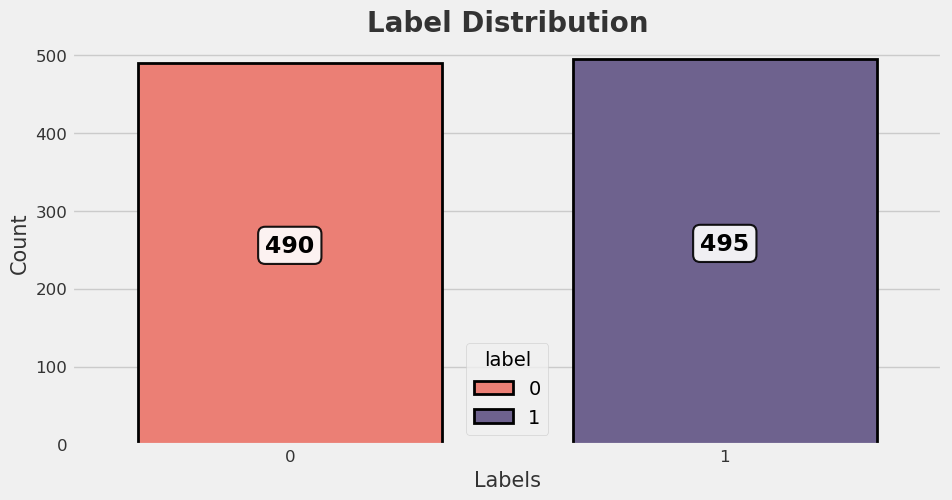

In [27]:
background_color = '#f0f0f0'
plt.figure(figsize=(10, 5), facecolor=background_color)
sns.set_palette("pastel")
p = sns.countplot(x="label", data=df, edgecolor='black', linewidth=2, width=0.7, palette = color_palette, hue="label")
for container in p.containers:
    p.bar_label(container, label_type="center", color="black", fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "white", "edgecolor": "black", "linewidth": 1.5, "alpha": 0.9})


plt.title("Label Distribution", fontweight='bold', fontsize=20, color='#333333')
plt.ylabel("Count", fontsize=15, color='#333333')
plt.xlabel("Labels", fontsize=15, color='#333333')

p.set_facecolor(background_color)
p.tick_params(colors='#333333', labelsize=12)

plt.show()

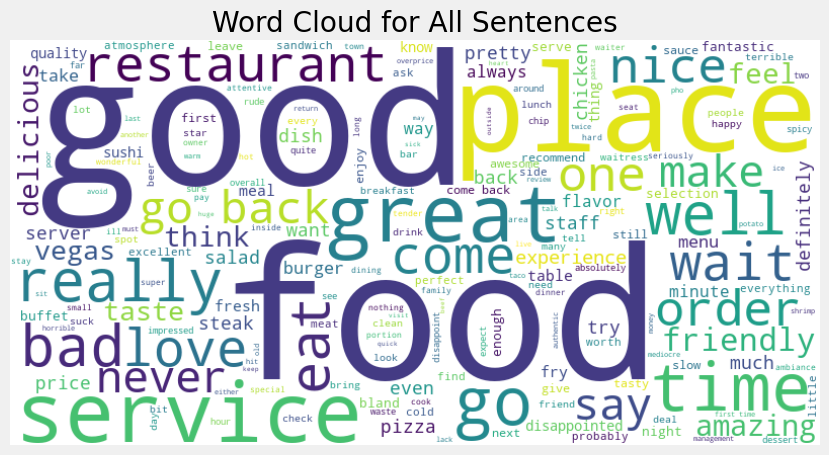

In [28]:
all_text = ' '.join(df['sentence'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Sentences')
plt.axis('off')
plt.show()

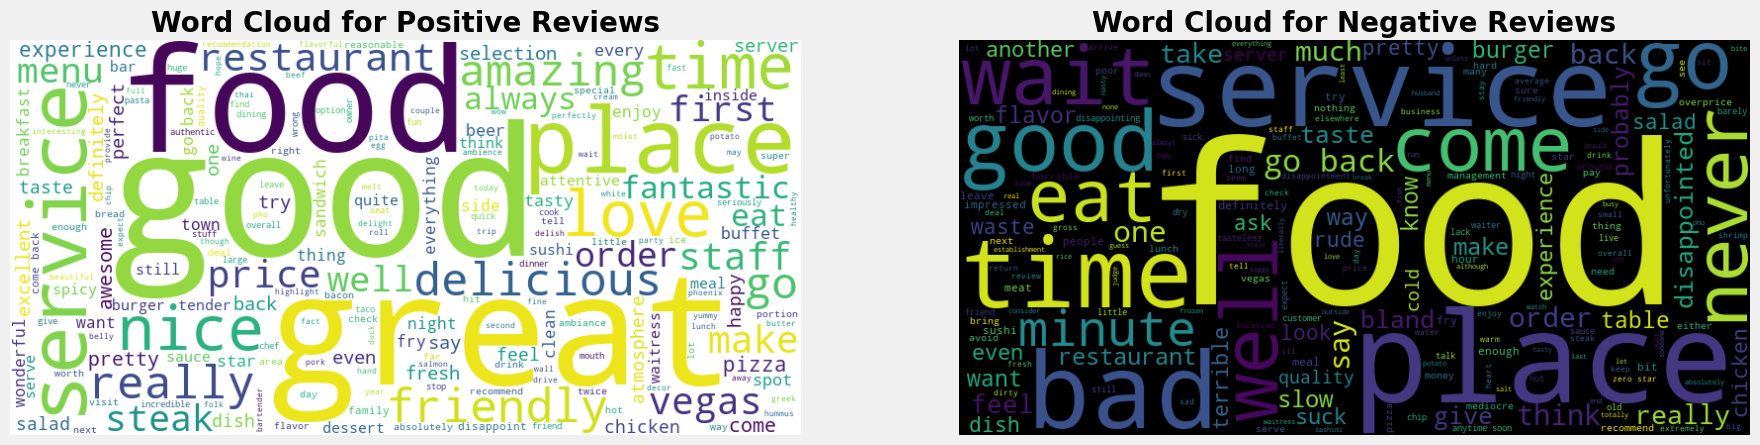

In [29]:
positive_text = ' '.join(df[df['label'] == 1]['sentence'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

negative_text = ' '.join(df[df['label'] == 0]['sentence'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=20, fontweight = 'bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20, fontweight = 'bold')
plt.axis('off')

plt.show()

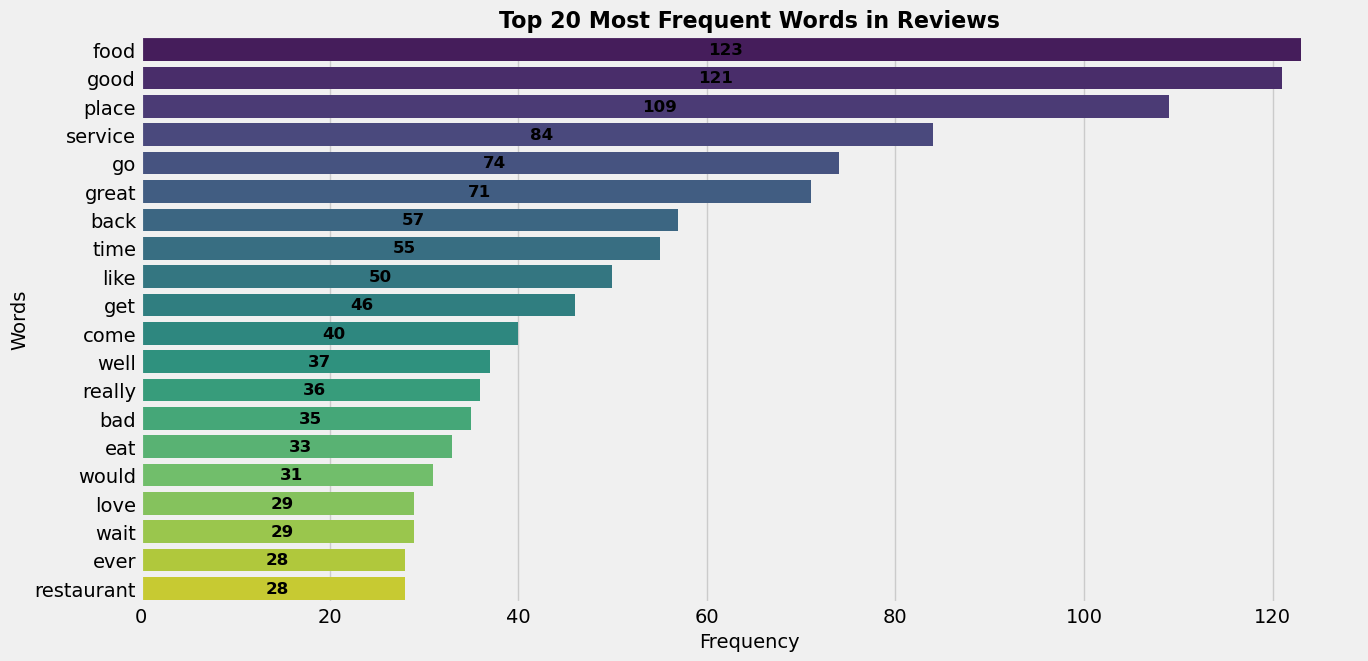

In [30]:
reviews = df['sentence']
positive_text = ' '.join(reviews)
positive_words = positive_text.split()
word_freq = Counter(positive_words)

most_common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(14, 7))
p = sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')

for container in p.containers:
    p.bar_label(container, label_type='center', color='black', fontsize=12, weight='bold', padding=3, fmt='%d')

plt.title('Top 20 Most Frequent Words in Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

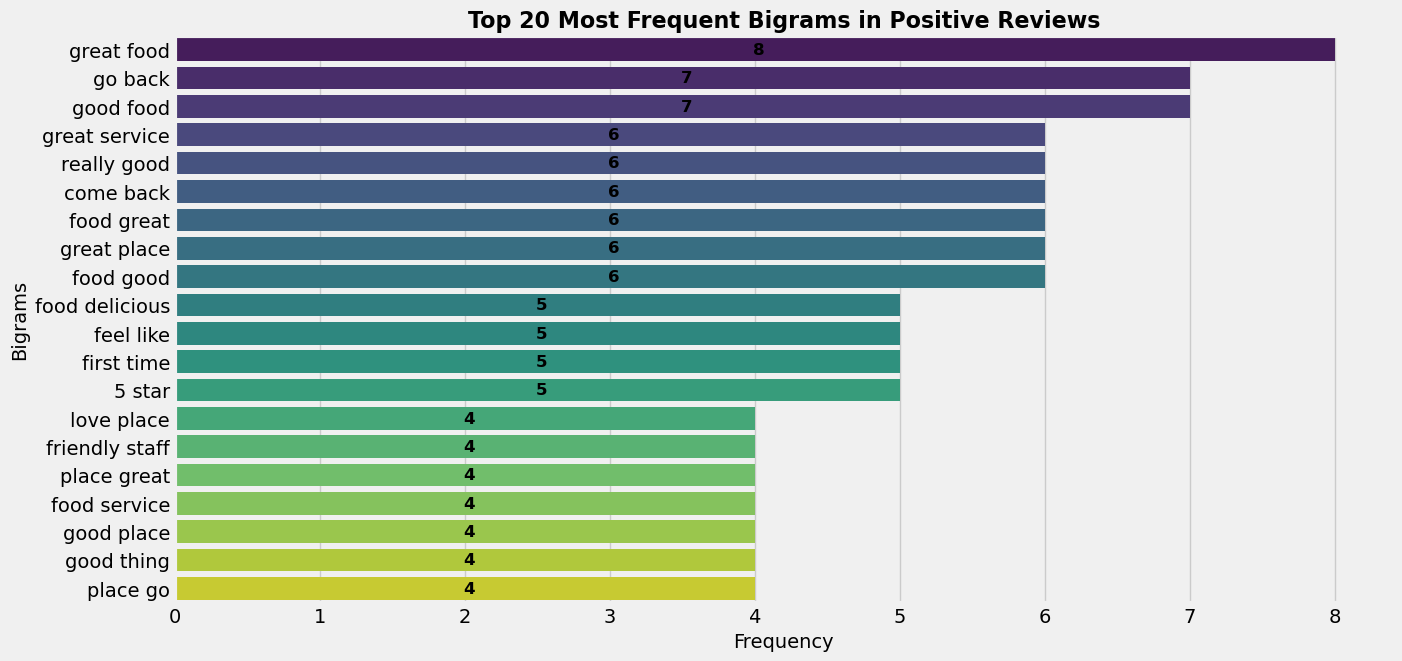

In [31]:
positive_reviews = df[df['label'] == 1]['sentence']
positive_text = ' '.join(positive_reviews)
positive_words = positive_text.split()
positive_bigrams = list(ngrams(positive_words, 2))

bigram_freq = Counter(positive_bigrams)

most_common_bigrams = bigram_freq.most_common(20)
common_bigrams_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])
common_bigrams_df['bigram'] = common_bigrams_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(14, 7))
p = sns.barplot(x='count', y='bigram', data=common_bigrams_df, palette='viridis')
for container in p.containers:
    p.bar_label(container, label_type='center', color='black', fontsize=12, weight='bold', padding=3, fmt='%d')

plt.title('Top 20 Most Frequent Bigrams in Positive Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigrams', fontsize=14)
plt.show()

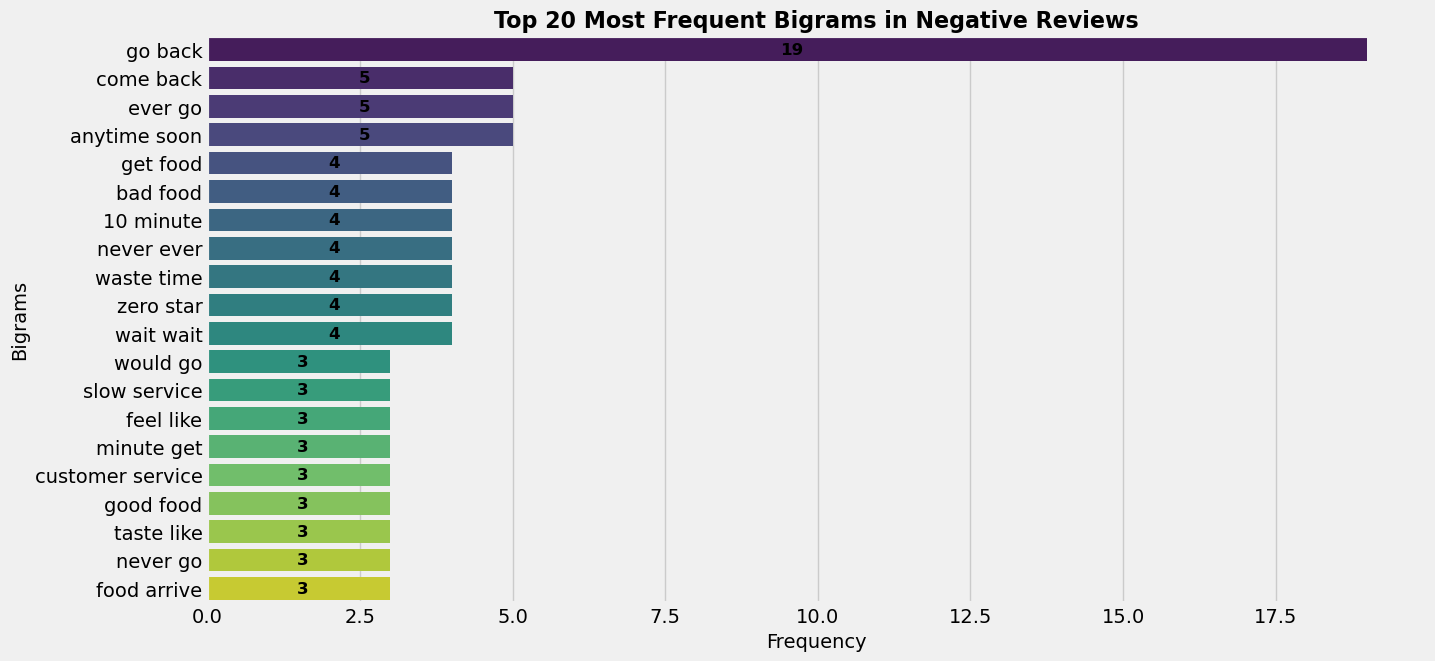

In [32]:
positive_reviews = df[df['label'] == 0]['sentence']
positive_text = ' '.join(positive_reviews)
positive_words = positive_text.split()
positive_bigrams = list(ngrams(positive_words, 2))

bigram_freq = Counter(positive_bigrams)

most_common_bigrams = bigram_freq.most_common(20)
common_bigrams_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])
common_bigrams_df['bigram'] = common_bigrams_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(14, 7))
p = sns.barplot(x='count', y='bigram', data=common_bigrams_df, palette='viridis')
for container in p.containers:
    p.bar_label(container, label_type='center', color='black', fontsize=12, weight='bold', padding=3, fmt='%d')

plt.title('Top 20 Most Frequent Bigrams in Negative Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigrams', fontsize=14)
plt.show()

In [33]:
#From the above visualizations we can see that the data for positive distribution is 495 and negative distribution is 490.

#From the Overall Word cloud visualization, The word "food" is the most prominent, followed by "good", "place", "service", "great", and "time"
#From the Positive Word Cloud visualization, words like "place", "good", "great", "service", and "love" are frequently used
#From the Negative Word Cloud visualization, words like "food", "bad", "come", "time", "minute", "wait", and "never" are used mostly

#From the Overall bar graph visualization, The 20 most frequently used words are "food", "good", and "place"
#From the Positive bar graph visualization, The 20 most frequently used words are "great food", "go back", and "good service"
#From the Negative bar graph visualization, The 20 most frequently used words are "go back", "come back", and "ever go"

In [34]:
#Data Preprocessing & Data Normalization

In [35]:
#Dropping Null records

In [36]:
df['sentence'] = df['sentence'].apply(remove_special_characters)
df[df['sentence'] == '']

,sentence,label
140,,0


In [37]:
df.drop(df[df['sentence'] == ''].index, inplace = True)
print("Total Number of Records after duplicate drop:",df.shape[0])

Total Number of Records after duplicate drop: 984


In [38]:
#Splitting the input features and output labels into X (input) and Y (output) variables

In [39]:
x = df['sentence'].values
y = df['label'].values


In [40]:
#Spliting the dataset into training and testing sets with 80:20 ratio

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
#Tokenized the sentences using Keras Tokenizer, fit on the text, and then applied text-to-sequence transformation

In [43]:
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(x_train)

In [44]:
word_index = tokenizer.word_index

In [45]:
list(word_index)[:10]

['<oov>',
 'good',
 'food',
 'place',
 'service',
 'go',
 'great',
 'like',
 'get',
 'time']

In [46]:
len(word_index)

1450

In [47]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [48]:
x_train[:10]

[[592, 200, 372, 156],
 [7, 10, 129, 106, 593, 79],
 [7, 5, 3],
 [80, 594, 130, 595],
 [20, 157, 373, 3, 40, 374, 596, 269, 375, 41, 81, 376, 131, 54, 4],
 [7, 201, 107],
 [108, 65],
 [202, 203],
 [22, 22, 22],
 [204, 8, 2, 158, 4, 597, 205, 377, 598, 3, 599, 82, 270]]

In [49]:
sequence_lengths = [len(seq) for seq in x_train]

# Find the minimum and maximum lengths
min_length = min(sequence_lengths)
max_length = max(sequence_lengths)

print(f"Minimum sequence length: {min_length}")
print(f"Maximum sequence length: {max_length}")

Minimum sequence length: 1
Maximum sequence length: 18


In [50]:
#Found that the minimum sequence length is 1 and the maximum sequence length is 18

In [51]:
error_sentences = df[df['sentence'].apply(lambda x: len(x.split()) < 2)]

print("Rows with sentences having fewer than 2 words:")
print(error_sentences)

Rows with sentences having fewer than 2 words:
          sentence label
19            like     0
24         perform     1
83           place     1
96            back     1
98            good     0
115          check     1
165      delicious     1
272           beat     1
278          think     0
326     disappoint     1
351       terrible     0
380           back     0
388       disgrace     0
424        mistake     0
425      complaint     1
453       insulted     0
479           love     1
489        awesome     1
581           rate     0
609            eat     0
619         return     0
621  disappointing     0
663          great     1
670             go     0
697        mortify     0
711          thing     0
764          happy     1
813           pack     0
834      excellent     1
911            sad     0
947   disappointed     0


In [52]:
#Applied pad_sequences with padding='post', maxlen=20, and truncating='post'

In [53]:
maxlen = 20
x_train = pad_sequences(x_train, padding = 'post', maxlen = maxlen, truncating = 'post')
x_test = pad_sequences(x_test, padding = 'post', maxlen = maxlen, truncating = 'post')

In [54]:
x_train[4]

array([ 20, 157, 373,   3,  40, 374, 596, 269, 375,  41,  81, 376, 131,
        54,   4,   0,   0,   0,   0,   0])

In [55]:
len(x_train[0])

20

In [56]:
x_train.shape

(787, 20)

In [57]:
#Model Building, Compiling, & Training

In [ ]:
#Keras Sequential Model: Used a Sequential model from the Keras library for building the neural network.
#Network Architecture: The model consists of three layers:
    #Embedding Layer: This layer takes numerical representations of words (tokens) and maps them to dense vectors, 
    #capturing semantic relationships between words.
    #SimpleRNN Layer: This recurrent layer processes the sequence of embedded tokens, capturing temporal dependencies in the data.
    #Dropout Layer: This layer randomly drops a certain percentage of units during training, helping to prevent overfitting.

In [58]:
model = Sequential()

model.add(Embedding(input_dim=len(word_index) + 1, output_dim=12))
model.add(SimpleRNN(22, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
#Loss Function: Used binary cross-entropy as the loss function, suitable for binary classification problems.
#Optimizer: Used the Adam optimizer, an efficient algorithm for optimizing the model's weights during training.
#Metrics: Tracked the model's accuracy during training to evaluate its performance.
#Training Process: Fit the model on the training data (X_train and Y_train) with a specified batch size. 
#Additionally, used an Early Stopping callback to halt training if the validation performance doesn't improve for a certain number of epochs, 
#preventing overfitting.S

In [61]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, callbacks=[early_stopping], batch_size = 26 )

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4958 - loss: 0.7749 - val_accuracy: 0.5888 - val_loss: 0.7543
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5742 - loss: 0.7452 - val_accuracy: 0.5888 - val_loss: 0.7330
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7307 - loss: 0.6576 - val_accuracy: 0.6751 - val_loss: 0.6708
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8821 - loss: 0.4720 - val_accuracy: 0.6701 - val_loss: 0.6734
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9329 - loss: 0.3263 - val_accuracy: 0.6954 - val_loss: 0.6694
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.2643 - val_accuracy: 0.7411 - val_loss: 0.6623
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.2205 - val_accuracy: 0.7462 - val_loss: 0.6773
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.2034 - val_accuracy: 0.7513 - val_loss

In [ ]:
#Visualizing Model Loss & Accuracy

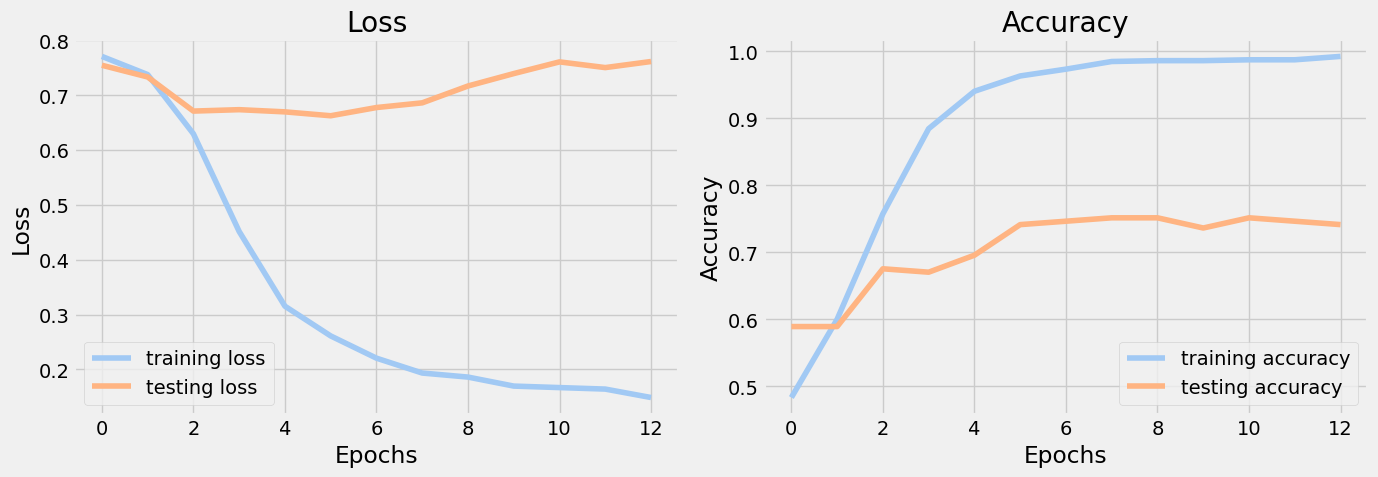

In [62]:
fig, axes = plt.subplots(1,2 , figsize =(14, 5))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

In [63]:
#Model Prediciton

In [64]:
def preprocess_input(sentence, tokenizer, maxlen=20):
    remove_spec_char = remove_special_characters(sentence)
    print(remove_spec_char)
    remove_stop_wrod = remove_stopwords(remove_spec_char)
    print(remove_stop_wrod)
    lema_sentence = lemmatize_sentence(remove_stop_wrod)
    print(lema_sentence)

    tokenize_sequence = tokenizer.texts_to_sequences([lema_sentence])
    padded_sequence = pad_sequences(tokenize_sequence, maxlen=maxlen, padding='post', truncating='post')
    
    return padded_sequence

In [68]:
sentence = 'The food was amazing and the service was excellent'
padded_input = preprocess_input(sentence, tokenizer, maxlen=20)
prediction = model.predict(padded_input)
print(f"Raw prediction value: {prediction[0][0]}")

# Determine if it's positive or negative
threshold = 0.5
if prediction[0][0] > threshold:
    print("Prediction: Positive")
else:
    print("Prediction: Negative")

The food was amazing and the service was excellent
food amazing service excellent
food amazing service excellent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Raw prediction value: 0.9404334425926208
Prediction: Positive


In [69]:
sentence = 'Bad service i will never come again'
padded_input = preprocess_input(sentence, tokenizer, maxlen=20)
prediction = model.predict(padded_input)
print(f"Raw prediction value: {prediction[0][0]}")

# Determine if it's positive or negative
threshold = 0.5
if prediction[0][0] > threshold:
    print("Prediction: Positive")
else:
    print("Prediction: Negative")

Bad service i will never come again
Bad service never come
bad service never come
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Raw prediction value: 0.07122613489627838
Prediction: Negative


Exploratory Data Analysis (EDA) revealed a balanced distribution of labels, with 490 negative and 495 positive reviews. Word clouds showed that food was the most prominent word overall. Positive reviews frequently mentioned words like place, good, and service, while negative reviews highlighted bad, come, and wait. The most frequent words and bigrams were plotted, revealing common phrases and sentiments in the reviews.

In the preprocessing and normalization stage, rows with empty values were dropped. The data was split into training and testing sets in an 80:20 ratio. Sentences were tokenized using Keras Tokenizer and transformed into sequences, which were then padded to ensure uniform length.

The model was built using a Keras Sequential model with an embedding layer, a SimpleRNN layer, and a dropout layer to prevent overfitting. The model was trained using binary cross-entropy loss and the Adam optimizer, with early stopping to avoid overfitting. The final model achieved an accuracy of 0.9776 and a validation accuracy of 0.7157.

Model predictions on test sentences were accurate: "The food was amazing and the service was excellent" was correctly predicted as positive, and "Bad service, I will never come again" was correctly predicted as negative.